<a href="https://colab.research.google.com/github/chauhanneha16/sentimentanalysis/blob/main/sentimentanalysisformultilingualdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers
!pip install torch
!pip install translate
!pip install scikit-learn
!pip install matplotlib


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
!pip install sentencepiece


Translations in Japanese:
I am very happy today! -> 今日はとても嬉しいです！
I feel so sad and down. -> 私はとても悲しく、落ち込んでいます。
I am extremely angry right now! -> 私は今とても怒っています！
I am scared of the dark. -> 私は暗闇が怖い。
I am surprised by the news. -> 私はその知らせに驚いている。

Translations in German:
I am very happy today! -> Ich bin heute sehr glücklich!
I feel so sad and down. -> Ich fühle mich so traurig und niedergeschlagen.
I am extremely angry right now! -> Ich bin gerade extrem wütend!
I am scared of the dark. -> Ich habe Angst vor der Dunkelheit.
I am surprised by the news. -> Ich bin überrascht von den Nachrichten.

Translations in Spanish:
I am very happy today! -> ¡Estoy muy feliz hoy!
I feel so sad and down. -> Me siento muy triste y deprimida.
I am extremely angry right now! -> ¡Estoy extremadamente enojado en este momento!
I am scared of the dark. -> Le tengo miedo a la oscuridad.
I am surprised by the news. -> Me sorprenden las noticias.

Translations in Italian:
I am very happy today! -> Oggi sono feli

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0



RoBERTa Results:

Original Results:
Accuracy: 0.0
EER: 0.25


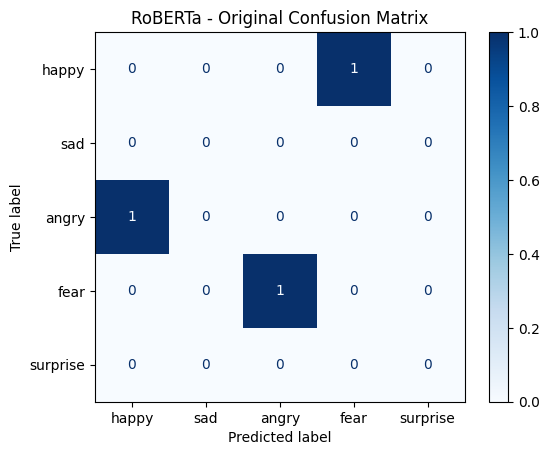


Japanese Results:
Accuracy: 0.2
EER: 0.0


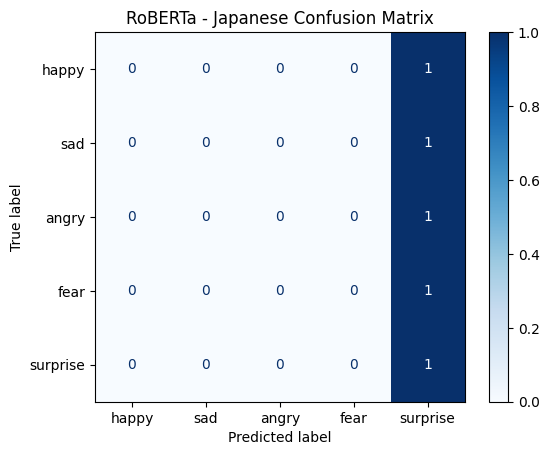


German Results:
Accuracy: 0.2
EER: 0.75


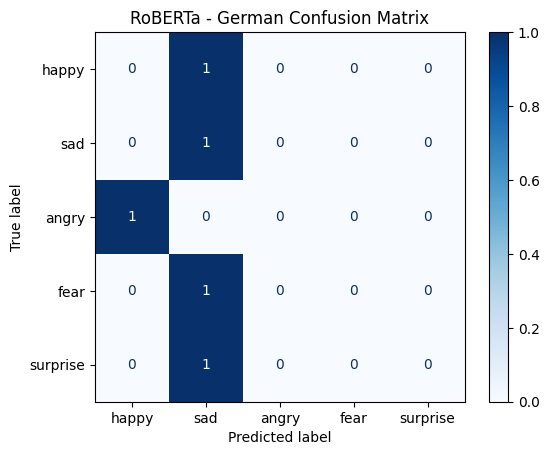


Spanish Results:
Accuracy: 0.2
EER: 0.5


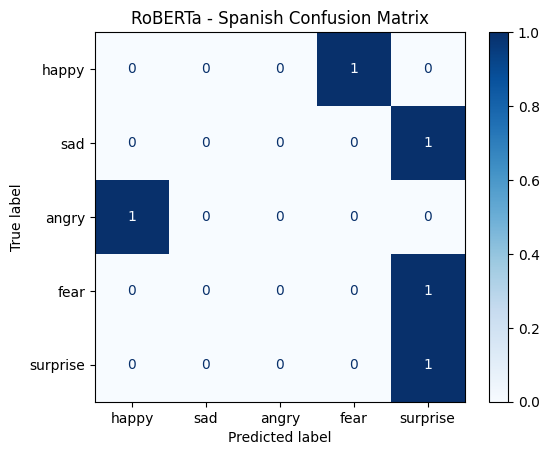


Italian Results:
Accuracy: 0.2
EER: 1.0


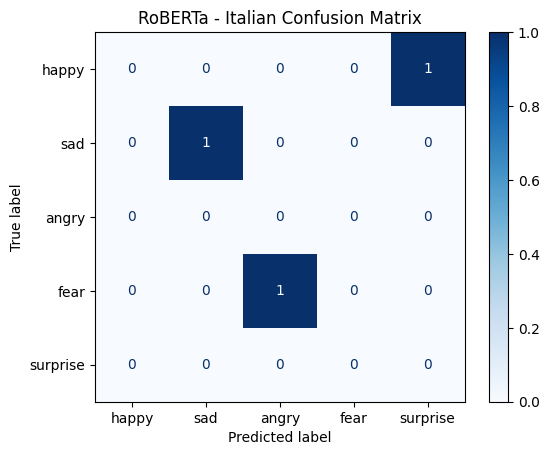


DistilBERT Results:

Original Results:
Accuracy: 0.0
EER: 1.0


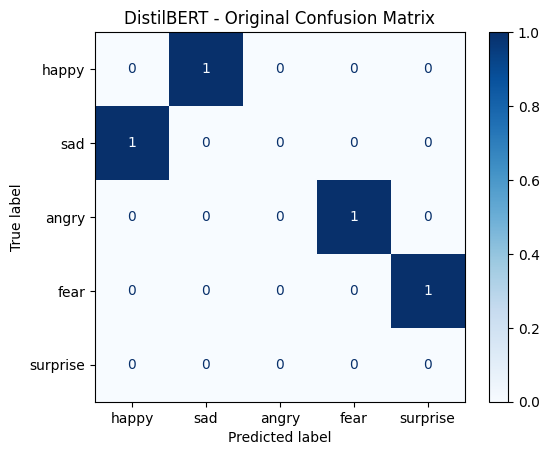


Japanese Results:
Accuracy: 0.2
EER: 0.0


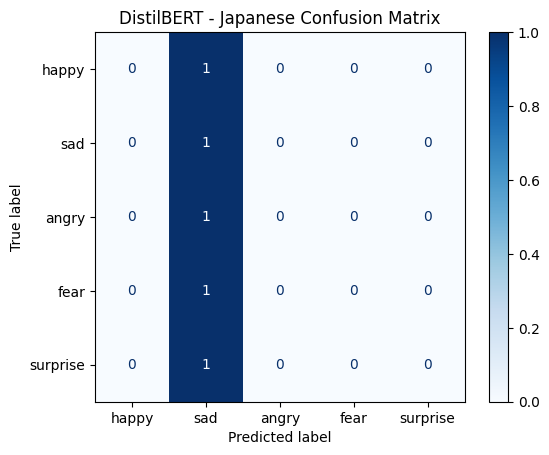


German Results:
Accuracy: 0.2
EER: 0.0


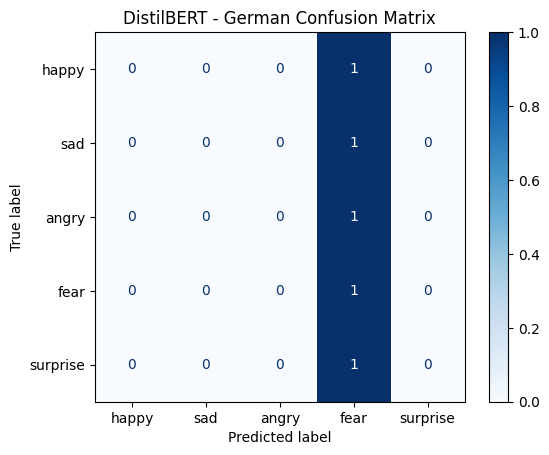


Spanish Results:
Accuracy: 0.2
EER: 0.25


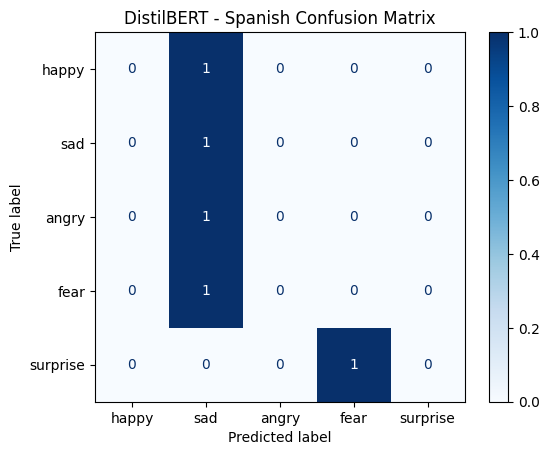


Italian Results:
Accuracy: 0.4
EER: 0.75


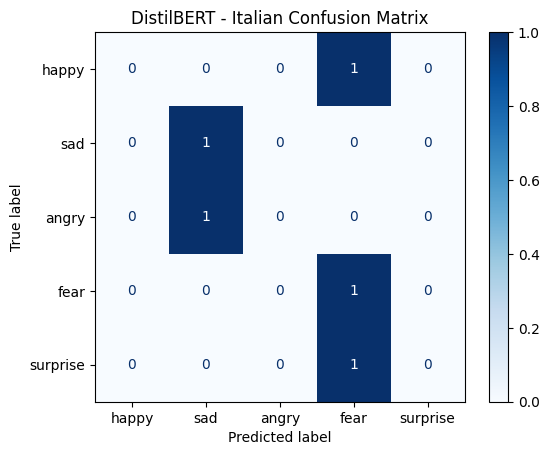


BERT Results:

Original Results:
Accuracy: 0.0
EER: 0.25


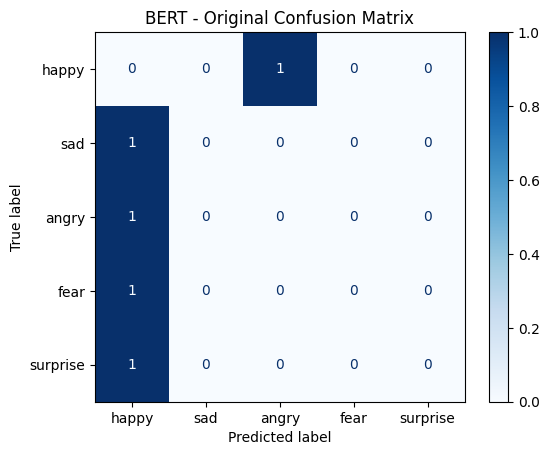


Japanese Results:
Accuracy: 0.2
EER: 0.0


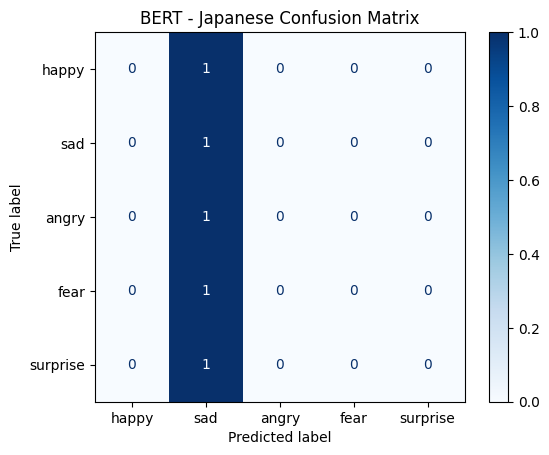


German Results:
Accuracy: 0.2
EER: 0.0


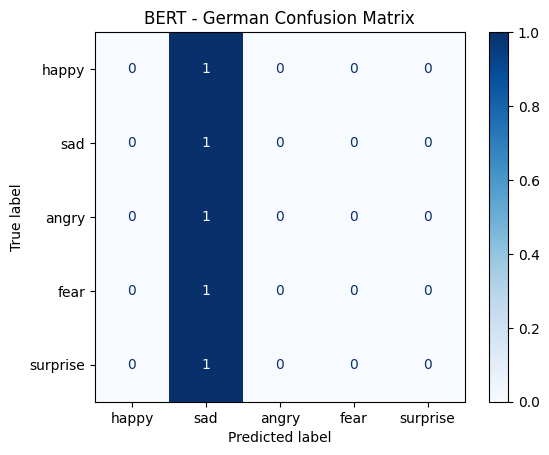


Spanish Results:
Accuracy: 0.2
EER: 0.25


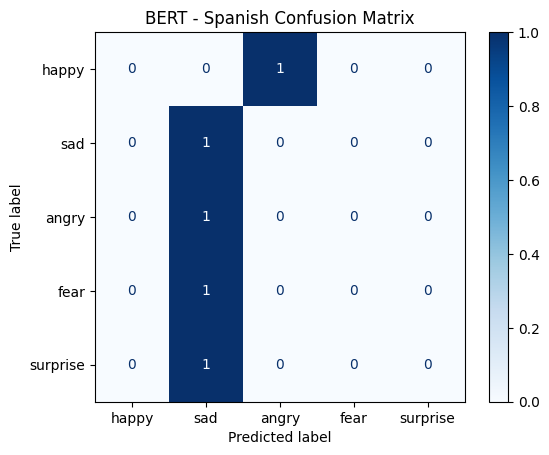


Italian Results:
Accuracy: 0.2
EER: 0.0


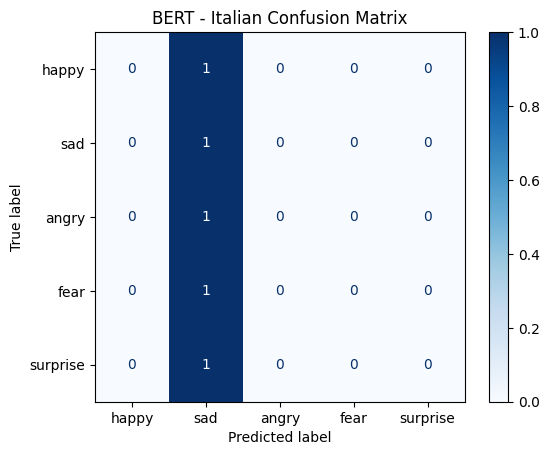

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import torch.nn.functional as F
from translate import Translator

# Function to translate text
def translate_text(text, target_language):
    translator = Translator(to_lang=target_language)
    try:
        translation = translator.translate(text)
        return translation
    except Exception as e:
        print(f"Error translating {text} to {target_language}: {e}")
        return None

# Example sentences with emotions
sentences = {
    "I am very happy today!": "happy",
    "I feel so sad and down.": "sad",
    "I am extremely angry right now!": "angry",
    "I am scared of the dark.": "fear",
    "I am surprised by the news.": "surprise"
}

# Translate sentences to Japanese, German, Spanish, and Italian
translations = {
    "Japanese": {sentence: translate_text(sentence, 'ja') for sentence in sentences},
    "German": {sentence: translate_text(sentence, 'de') for sentence in sentences},
    "Spanish": {sentence: translate_text(sentence, 'es') for sentence in sentences},
    "Italian": {sentence: translate_text(sentence, 'it') for sentence in sentences},
}

# Print translations for verification
for lang, translated_sentences in translations.items():
    print(f"\nTranslations in {lang}:")
    for sentence, translation in translated_sentences.items():
        if translation:
            print(f"{sentence} -> {translation}")
        else:
            print(f"{sentence} -> Translation failed")

# Load multilingual emotion recognition models
model_names = {
    "RoBERTa": "j-hartmann/emotion-english-distilroberta-base",
    "DistilBERT": "bhadresh-savani/distilbert-base-uncased-emotion",
    "BERT": "finiteautomata/bertweet-base-sentiment-analysis"
}

huggingface_token = "neha"

# Function to get emotion from text using the specified model
def get_emotion(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    probs = F.softmax(outputs.logits, dim=1)
    label = torch.argmax(probs).item()
    return label

# Map emotions to numerical labels for consistency
emotion_labels = {
    "happy": 0,
    "sad": 1,
    "angry": 2,
    "fear": 3,
    "surprise": 4
}

# Prepare test data (both original and translated)
test_data = list(sentences.keys())
test_labels = [emotion_labels[sentences[sent]] for sent in test_data]

# Predict emotions using the model
def predict_emotions(data, tokenizer, model):
    return [get_emotion(text, tokenizer, model) for text in data]

# Evaluate model
def evaluate_model(predictions, labels):
    acc = accuracy_score(labels, predictions)
    cm = confusion_matrix(labels, predictions, labels=list(emotion_labels.values()))
    return acc, cm

# Calculate EER
def calculate_eer(labels, predictions):
    fpr, tpr, thresholds = roc_curve(labels, predictions, pos_label=1)
    eer = fpr[np.nanargmin(np.absolute((1 - tpr - fpr)))]
    return eer

# Compare models
results = {}
languages = ["Original", "Japanese", "German", "Spanish", "Italian"]

for model_name, model_path in model_names.items():
    tokenizer = AutoTokenizer.from_pretrained(model_path, token=huggingface_token)
    model = AutoModelForSequenceClassification.from_pretrained(model_path, token=huggingface_token)

    model_results = {}
    for lang in languages:
        if lang == "Original":
            data = test_data
        else:
            data = list(translations[lang].values())
        predictions = predict_emotions(data, tokenizer, model)
        acc, cm = evaluate_model(predictions, test_labels)
        eer = calculate_eer(test_labels, predictions)
        model_results[lang] = {
            "accuracy": acc,
            "confusion_matrix": cm,
            "eer": eer
        }
    results[model_name] = model_results

# Print and visualize results
for model_name, model_results in results.items():
    print(f"\n{model_name} Results:")
    for lang, result in model_results.items():
        print(f"\n{lang} Results:")
        print(f"Accuracy: {result['accuracy']}")
        print(f"EER: {result['eer']}")
        disp = ConfusionMatrixDisplay(confusion_matrix=result['confusion_matrix'],
                                      display_labels=list(emotion_labels.keys()))
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f"{model_name} - {lang} Confusion Matrix")
        plt.show()
